In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

Using TensorFlow backend.
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Class 0: 283
Class 1: 17
Proportion: 16.6471 : 1


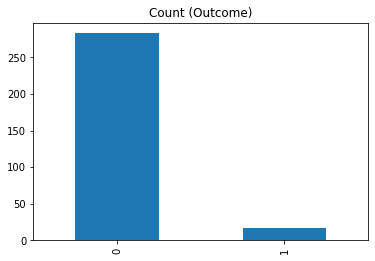

In [2]:
df = pd.read_csv('C:\\Users\\jamie\\AppData\\Desktop\\PhD\\Datasets\\MSc-Sleep-Data\\Subject1.csv')
df = df.drop('Date', 1)
df = df.drop('Gender', 1)

target_count = df.Outcome.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

target_count.plot(kind='bar', title='Count (Outcome)');

In [3]:
# Class count
count_class_0, count_class_1 = df.Outcome.value_counts()

# Divide by class
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

Random under-sampling:
1    17
0    17
Name: Outcome, dtype: int64


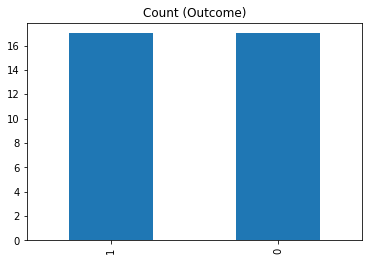

In [4]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())

df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');

Random over-sampling:
1    283
0    283
Name: Outcome, dtype: int64


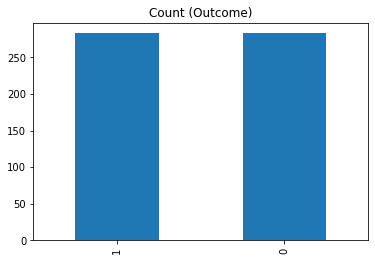

In [5]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');


In [6]:
#LOGISTICAL REGRESSION
#Building a Logistic Regression model
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.3,random_state=33)

#Training and Predicting
#Import the Logisitcal Regression Library from SKLearn
from sklearn.linear_model import LogisticRegression

#create instance of logistical regression model called logmodel
logmodel=LogisticRegression()
#pass the data to the logmodel
logmodel.fit(x_train,y_train)

#make predictions with model on unseen test data
predictions = logmodel.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for Logistical Regression Model is:",accuracy_score(y_test, predictions)*100)
print("\nLogisitcal Regression Classification Report\n")
print(classification_report(y_test,predictions))
print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))


Accuracy score for Logistical Regression Model is: 96.47058823529412

Logisitcal Regression Classification Report

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        81
           1       0.94      1.00      0.97        89

    accuracy                           0.96       170
   macro avg       0.97      0.96      0.96       170
weighted avg       0.97      0.96      0.96       170


Logisitcal Regression AUCROC is 0.963


In [7]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score


cm=confusion_matrix(y_test, predictions)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)

Confusion Matrix : 
 [[75  6]
 [ 0 89]]
Accuracy :  0.9647058823529412
Sensitivity :  0.9259259259259259
Specificity :  1.0
Precision: 0.936842


In [8]:
#RANDOM FOREST

X = df_test_over.iloc[:, :-3].values

#y-axis uses the variable outcome as its target variable
y = df_test_over["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#shows percentage of seizures compared to non seizures
np.mean(y), np.mean(1-y)


## Train the RF Model
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


#list the performance metrics the model emanates
print('\nAccuracy Score for Random Forest Model is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)*100))
print('\nRandom Forest roc-auc measure is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))
print("\nRandom Forest  Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))


Accuracy Score for Random Forest Model is 91.228

Random Forest roc-auc measure is 0.969

Random Forest  Classification Report

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        55
           1       0.95      0.88      0.91        59

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [9]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_class_rf)
print('Confusion Matrix for RF: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_class_rf)
print('Precision: %f' % precision)

Confusion Matrix for RF: 
 [[52  3]
 [ 7 52]]
Accuracy :  0.9122807017543859
Sensitivity :  0.9454545454545454
Specificity :  0.8813559322033898
Precision: 0.945455


In [10]:
#NEURAL NETWORK

## normalize the data

X = df_test_over.iloc[:, :-1].values

#y-axis uses the variable outcome as its target variable
y = df_test_over["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 1 hidden layer, 12 hidden nodes, sigmoid activation

model_1 = Sequential([
    Dense(12, input_shape=(5,), activation="relu"),
    Dense(1, activation="sigmoid")
])

print("\n************Start of Nerual Netwrok Summary*********")
model_1.summary()

# Fit(Train) the Model
model_1.compile(SGD(lr = .002), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('\n')
print('\nAccuracy Score for Nerual Network is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)*100))
print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_class_nn_1)))


W0910 16:34:38.317182 15032 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0910 16:34:38.364059 15032 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 16:34:38.372035 15032 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0910 16:34:38.427930 15032 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0910 16:34:38.432873 15032 deprecation_wrapper.py:119] From C:\Users\jamie\Anac


************Start of Nerual Netwrok Summary*********
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


W0910 16:34:38.644486 15032 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 452 samples, validate on 114 samples
Epoch 1/200
452/452 [==============================] - 0s 569us/step - loss: 0.6016 - acc: 0.6814 - val_loss: 0.5475 - val_acc: 0.7456
Epoch 2/200
452/452 [==============================] - 0s 38us/step - loss: 0.5911 - acc: 0.6814 - val_loss: 0.5387 - val_acc: 0.7544
Epoch 3/200
452/452 [==============================] - 0s 31us/step - loss: 0.5801 - acc: 0.6903 - val_loss: 0.5303 - val_acc: 0.7807
Epoch 4/200
452/452 [==============================] - 0s 26us/step - loss: 0.5697 - acc: 0.7190 - val_loss: 0.5222 - val_acc: 0.7807
Epoch 5/200
452/452 [==============================] - 0s 31us/step - loss: 0.5596 - acc: 0.7168 - val_loss: 0.5147 - val_acc: 0.7807
Epoch 6/200
452/452 [==============================] - 0s 31us/step - loss: 0.5505 - acc: 0.7190 - val_loss: 0.5073 - val_acc: 0.7807
Epoch 7/200
452/452 [==============================] - 0s 29us/step - loss: 0.5413 - acc: 0.7500 - val_loss: 0.5002 - val_acc: 0.7895
Epoch 8/200
452

452/452 [==============================] - 0s 27us/step - loss: 0.3251 - acc: 0.9004 - val_loss: 0.3087 - val_acc: 0.9211
Epoch 62/200
452/452 [==============================] - 0s 26us/step - loss: 0.3232 - acc: 0.9004 - val_loss: 0.3068 - val_acc: 0.9211
Epoch 63/200
452/452 [==============================] - 0s 31us/step - loss: 0.3214 - acc: 0.9004 - val_loss: 0.3050 - val_acc: 0.9211
Epoch 64/200
452/452 [==============================] - 0s 35us/step - loss: 0.3196 - acc: 0.9004 - val_loss: 0.3032 - val_acc: 0.9211
Epoch 65/200
452/452 [==============================] - 0s 26us/step - loss: 0.3177 - acc: 0.9004 - val_loss: 0.3014 - val_acc: 0.9211
Epoch 66/200
452/452 [==============================] - 0s 26us/step - loss: 0.3160 - acc: 0.9027 - val_loss: 0.2997 - val_acc: 0.9211
Epoch 67/200
452/452 [==============================] - 0s 24us/step - loss: 0.3143 - acc: 0.9027 - val_loss: 0.2980 - val_acc: 0.9211
Epoch 68/200
452/452 [==============================] - 0s 24us/step

452/452 [==============================] - 0s 24us/step - loss: 0.2512 - acc: 0.9093 - val_loss: 0.2335 - val_acc: 0.9298
Epoch 122/200
452/452 [==============================] - 0s 26us/step - loss: 0.2503 - acc: 0.9093 - val_loss: 0.2327 - val_acc: 0.9298
Epoch 123/200
452/452 [==============================] - 0s 24us/step - loss: 0.2496 - acc: 0.9115 - val_loss: 0.2319 - val_acc: 0.9298
Epoch 124/200
452/452 [==============================] - 0s 22us/step - loss: 0.2488 - acc: 0.9115 - val_loss: 0.2311 - val_acc: 0.9298
Epoch 125/200
452/452 [==============================] - 0s 24us/step - loss: 0.2480 - acc: 0.9115 - val_loss: 0.2303 - val_acc: 0.9298
Epoch 126/200
452/452 [==============================] - 0s 22us/step - loss: 0.2473 - acc: 0.9115 - val_loss: 0.2295 - val_acc: 0.9298
Epoch 127/200
452/452 [==============================] - 0s 22us/step - loss: 0.2465 - acc: 0.9115 - val_loss: 0.2287 - val_acc: 0.9298
Epoch 128/200
452/452 [==============================] - 0s 22

452/452 [==============================] - 0s 22us/step - loss: 0.2140 - acc: 0.9115 - val_loss: 0.1944 - val_acc: 0.9298
Epoch 182/200
452/452 [==============================] - 0s 22us/step - loss: 0.2135 - acc: 0.9115 - val_loss: 0.1939 - val_acc: 0.9298
Epoch 183/200
452/452 [==============================] - 0s 22us/step - loss: 0.2131 - acc: 0.9115 - val_loss: 0.1934 - val_acc: 0.9298
Epoch 184/200
452/452 [==============================] - 0s 22us/step - loss: 0.2126 - acc: 0.9115 - val_loss: 0.1929 - val_acc: 0.9298
Epoch 185/200
452/452 [==============================] - 0s 20us/step - loss: 0.2121 - acc: 0.9115 - val_loss: 0.1924 - val_acc: 0.9298
Epoch 186/200
452/452 [==============================] - 0s 23us/step - loss: 0.2116 - acc: 0.9115 - val_loss: 0.1918 - val_acc: 0.9298
Epoch 187/200
452/452 [==============================] - 0s 24us/step - loss: 0.2112 - acc: 0.9115 - val_loss: 0.1913 - val_acc: 0.9298
Epoch 188/200
452/452 [==============================] - 0s 21

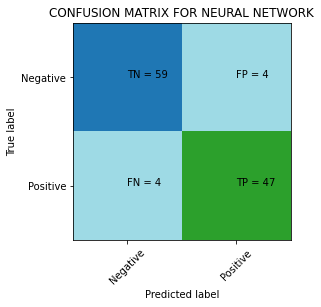

Precision: 0.921569
Confusion Matrix : 
 [[59  4]
 [ 4 47]]
Accuracy :  0.9298245614035088
Sensitivity :  0.9365079365079365
Specificity :  0.9215686274509803


<Figure size 432x288 with 0 Axes>

In [11]:
cm=confusion_matrix(y_test, y_pred_class_nn_1)
fig1 = plt.gcf()
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20_r)
classNames = ['Negative','Positive']
plt.title("CONFUSION MATRIX FOR NEURAL NETWORK")
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
plt.draw()
fig1.savefig('tessstttyyy.png', dpi=100)


#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score
precision = precision_score(y_test, y_pred_class_nn_1)
print('Precision: %f' % precision)

cm=confusion_matrix(y_test, y_pred_class_nn_1)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)


Logisitcal Regression AUCROC is 0.987


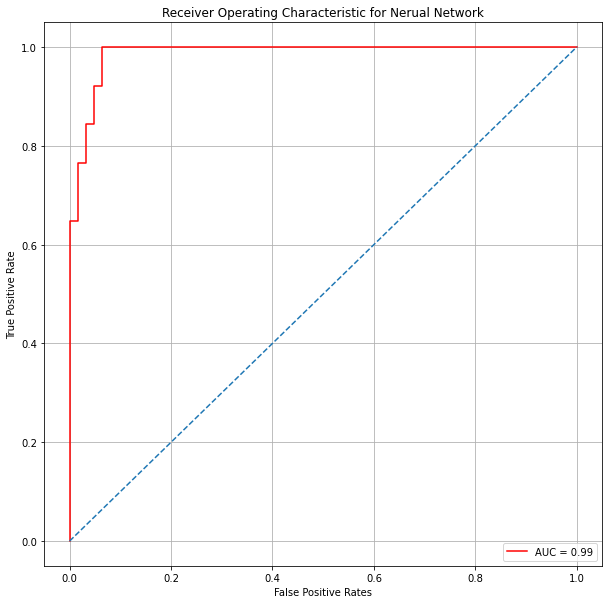

In [12]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob_nn_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Nerual Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

In [13]:
#DECISION TREE WITH GINI INDEX

#first 3 attributes are used for the x-axis
X = df_test_over.values[:, 0:4]
#attributes after number 3 are used for the y-axis
Y = df_test_over.values[:,-1]

#import Accuracy Score to guage performance
from sklearn.metrics import accuracy_score

#Split the dataset using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 545)

#implement a depth of 5, with a minimum of 5 leaf nodes and a random state of 100
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 1,
                               max_depth=5, min_samples_leaf=10)

#pass the training data to the decision tree
dt_clf_gini.fit(X_train, y_train)

#make prediction using unseen test data
y_pred_gini = dt_clf_gini.predict(X_test)

#methods used to show the performance metrics of the model
print ("\nAccuracy Score for Desicion Tree Model using Gini Index is ", accuracy_score(y_test,y_pred_gini)*100 )
print("\nDesicion Tree  Classification Report\n")
print(classification_report(y_test,y_pred_gini))
print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_gini)))




Accuracy Score for Desicion Tree Model using Gini Index is  93.52941176470588

Desicion Tree  Classification Report

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        85
         1.0       0.92      0.95      0.94        85

    accuracy                           0.94       170
   macro avg       0.94      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170


Nerual Network roc-auc is 0.935


In [14]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score
precision = precision_score(y_test, y_pred_gini)
print('Precision: %f' % precision)

cm=confusion_matrix(y_test, y_pred_gini)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Precision: 0.920455
Confusion Matrix : 
 [[78  7]
 [ 4 81]]
Accuracy :  0.9352941176470588
Sensitivity :  0.9176470588235294
Specificity :  0.9529411764705882


Logistic: f1=0.936 auc=0.948


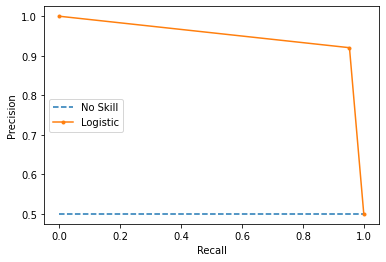

In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot




# predict probabilities
lr_probs = dt_clf_gini.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = dt_clf_gini.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred_gini)
lr_f1, lr_auc = f1_score(y_test,y_pred_gini), auc(lr_recall, lr_precision)
# summarize scores

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\jamie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


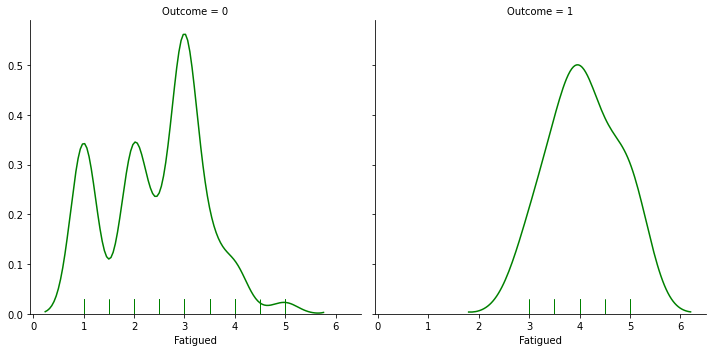

In [16]:
# Explore Age vs Survived
g = sns.FacetGrid(df, col='Outcome',size = 5 )
g = g.map(sns.distplot, "Fatigued",bins=5,hist=False, rug=True,color='green')



C:\Users\jamie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


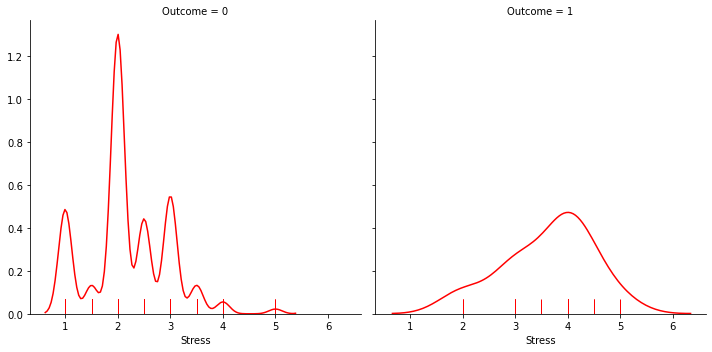

In [18]:
g = sns.FacetGrid(df, col='Outcome',size = 5 )
g = g.map(sns.distplot, "Stress",bins=5,hist=False, rug=True,color='red')

